In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as pyp
import csv
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

%matplotlib inline

8316
8316
8316


/home/donald/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


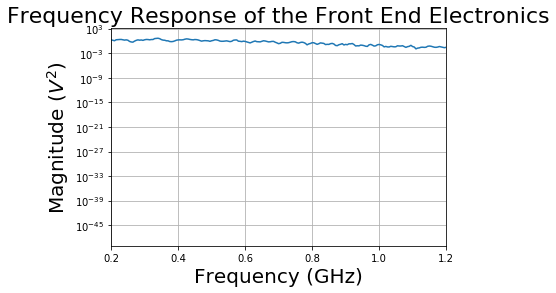

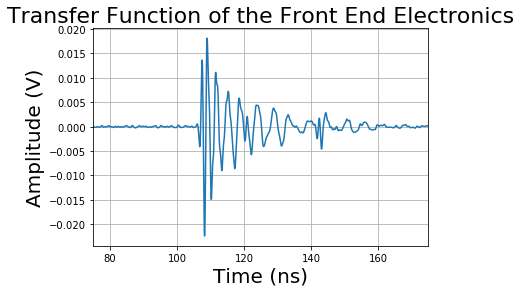

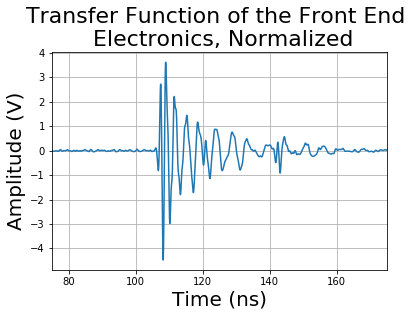

In [2]:
#Electronics Transfer



SurfTime=[]

SurfAmp=[]

f = open('Surf_Atten.csv')

Surf = csv.reader(f)

for row in Surf:
    SurfTime.append(float(row[0]))
    SurfAmp.append(float(row[1]))

f.close()


#plt.grid(True)
#plt.plot(SurfTime,SurfAmp)
#plt.title('Output Signal',fontsize=22)
#plt.xlabel('Time (ns)',fontsize=20)
#plt.ylabel('Magnitude (V)',fontsize=20)

#print(np.sqrt(max(np.array(SurfAmp)*np.array(SurfAmp))))

#plt.xlim(75,150)


#plt.figure(2)
N = len(SurfTime)
dt = SurfTime[1]-SurfTime[0]
#print(dt, N)


fft_Surf = fft.fft(SurfAmp)
fft_Surf_shift = fft.fftshift(fft_Surf)

freq_Surf = fft.fftfreq(N, dt)

SURF_FFT = fft_Surf_shift

#plt.semilogy(fft.fftshift(freq_Surf), abs(SURF_FFT))

#plt.grid(True)
#plt.title('Spectrum of Output',fontsize=22)
#plt.xlabel('Frequency (GHz)',fontsize=20)
#plt.ylabel('Magnitude ($V^2$)',fontsize=20)
#plt.xlim([0.2,1.2])
#plt.ylim(1,1000)

















AmpaAmp=[]
AmpaTime=[]

f = open('Ampa_Atten.csv')

Ampa = csv.reader(f)

for row in Ampa:
    AmpaTime.append(float(row[0])*10**(-9))
    AmpaAmp.append(float(row[1]))

f.close()
#plt.grid(True)
#plt.plot(AmpaTime,AmpaAmp)
#plt.title('Input Signal',fontsize=22)
#plt.xlabel('Time (s)',fontsize=20)
#plt.ylabel('Magnitude (V)',fontsize=20)
#plt.xlim(1e-8,.18e-7)
#print(np.sqrt(max(np.array(AmpaAmp)*np.array(AmpaAmp))))





#plt.figure(2)
N = len(AmpaTime)
dt = AmpaTime[1]-AmpaTime[0]
#print(dt, N)


fft_Ampa = fft.fft(AmpaAmp)
fft_Ampa_shift = fft.fftshift(fft_Ampa)

freq_Ampa = fft.fftfreq(N, dt)

Ampa_FFT = fft_Ampa_shift


#FreqDom=fft.fftshift(freq_Ampa)/10**9

#plt.semilogy(FreqDom, abs(Ampa_FFT))
#plt.grid(True)
#plt.title('Spectrum of Input',fontsize=22)
#plt.xlabel('Frequency (GHz)',fontsize=20)
#plt.ylabel('Magnitude ($V^2$)',fontsize=20)
#plt.xlim([0.2,1.2])
#plt.ylim(10**(-4),1)



#elec_Transfer=[]
#for i in range(len(SURF_FFT)):
#    elec_Transfer.append(SURF_FFT[i]/Ampa_FFT[i])

elec_Transfer=SURF_FFT*Ampa_FFT
#print(SURF_FFT,Ampa_FFT,elec_Transfer)


freqDom=fft.fftshift(freq_Ampa)*10**(-9)


df=freqDom[2]-freqDom[1]

plt.semilogy(freqDom, abs(elec_Transfer**2))

print(len(elec_Transfer))

print(len(freqDom))

plt.title('Frequency Response of the Front End Electronics',fontsize=22)
plt.xlabel('Frequency (GHz)',fontsize=20)
plt.ylabel('Magnitude ($V^2$)',fontsize=20)


plt.grid(True)

plt.xlim(0.2,1.2);
#plt.ylim(10**(1),10**4);




f=fft.ifftshift(elec_Transfer)
yi=fft.ifft(f)


for i in range(len(AmpaTime)):
    AmpaTime[i]*=10**9

plt.figure(2)
plt.plot(AmpaTime,yi)

plt.title('Transfer Function of the Front End Electronics',fontsize=22)
plt.xlabel('Time (ns)',fontsize=20)
plt.ylabel('Amplitude (V)',fontsize=20)


plt.grid(True)

plt.xlim(75,175);
#plt.ylim(10**(0.5),10**2);

plt.figure(3)
plt.plot(AmpaTime,yi/df)

print(len(yi))

plt.title('Transfer Function of the Front End \n Electronics, Normalized',fontsize=22)
plt.xlabel('Time (ns)',fontsize=20)
plt.ylabel('Amplitude (V)',fontsize=20)


plt.grid(True)

plt.xlim(75,175);


#for i in range(len(yi)):
#    print(SURF_FFT[i],Ampa_FFT[i],elec_Transfer[i])

/home/donald/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


8316
-0.039364925611935594 ,
1.1378503047220345 ,
0.10990822158262313 ,
-1.5217962421458424 ,
-0.5891880917584373 ,
-0.6347185709214093 ,
-1.545599218741547 ,
1.7756148229653657 ,
4.821058583977519 ,
-1.7823009263565235 ,
-1.947589533082138 ,
-0.004009422404384165 ,
-0.004107659473353139 ,
-0.297649355511559 ,
-1.399806823378294 ,
-1.4640775544942684 ,
3.042548447643443 ,
1.1954214776948258 ,
-1.3820327131051076 ,
-0.6716381420498668 ,
-0.008594486676978166 ,
-0.5510648505240692 ,
0.33270473677098067 ,
1.0464798821649062 ,
0.31815644247302916 ,
-0.455462031838672 ,
-0.5142136869435403 ,
0.41102286924832315 ,
1.8382522778210804 ,
-0.13769458737620602 ,
-1.76359594807083 ,
-2.7002608360809637 ,
0.8111157971492825 ,
2.554629801914662 ,
-1.318356639466479 ,
-1.5140676325711804 ,
1.7459438230171176 ,
-0.08767533752493871 ,
1.3036157333105634 ,
-0.6873261536550899 ,
-0.6364859633157255 ,
0.14976726167705945 ,
-1.705730700286035 ,
-0.7366339570363288 ,
-0.14234853852235235 ,
-0.89904659911827

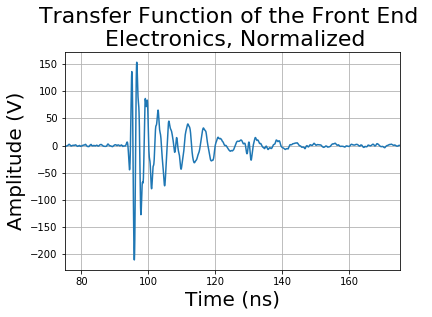

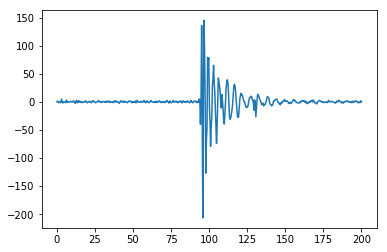

In [3]:
#Electronics Transfer



SurfTime=[]

SurfAmp=[]

f = open('Surf_Atten.csv')

Surf = csv.reader(f)

for row in Surf:
    SurfTime.append(float(row[0]))
    SurfAmp.append(float(row[1]))

f.close()


#plt.grid(True)
#plt.plot(SurfTime,SurfAmp)
#plt.title('Output Signal',fontsize=22)
#plt.xlabel('Time (ns)',fontsize=20)
#plt.ylabel('Magnitude (V)',fontsize=20)

#print(np.sqrt(max(np.array(SurfAmp)*np.array(SurfAmp))))

#plt.xlim(75,150)


#plt.figure(2)
N = len(SurfTime)
dt = SurfTime[1]-SurfTime[0]
#print(dt, N)


fft_Surf = fft.fft(SurfAmp)
fft_Surf_shift = fft.fftshift(fft_Surf)

freq_Surf = fft.fftfreq(N, dt)

SURF_FFT = fft_Surf_shift

#plt.semilogy(fft.fftshift(freq_Surf), abs(SURF_FFT))

#plt.grid(True)
#plt.title('Spectrum of Output',fontsize=22)
#plt.xlabel('Frequency (GHz)',fontsize=20)
#plt.ylabel('Magnitude ($V^2$)',fontsize=20)
#plt.xlim([0.2,1.2])
#plt.ylim(1,1000)

















AmpaAmp=[]
AmpaTime=[]

f = open('Ampa_Atten.csv')

Ampa = csv.reader(f)

for row in Ampa:
    AmpaTime.append(float(row[0])*10**(-9))
    AmpaAmp.append(float(row[1]))

f.close()
#plt.grid(True)
#plt.plot(AmpaTime,AmpaAmp)
#plt.title('Input Signal',fontsize=22)
#plt.xlabel('Time (s)',fontsize=20)
#plt.ylabel('Magnitude (V)',fontsize=20)
#plt.xlim(1e-8,.18e-7)
#print(np.sqrt(max(np.array(AmpaAmp)*np.array(AmpaAmp))))





#plt.figure(2)
N = len(AmpaTime)
dt = AmpaTime[1]-AmpaTime[0]
#print(dt, N)


fft_Ampa = fft.fft(AmpaAmp)
fft_Ampa_shift = fft.fftshift(fft_Ampa)

freq_Ampa = fft.fftfreq(N, dt)

Ampa_FFT = fft_Ampa_shift


#FreqDom=fft.fftshift(freq_Ampa)/10**9

#plt.semilogy(FreqDom, abs(Ampa_FFT))
#plt.grid(True)
#plt.title('Spectrum of Input',fontsize=22)
#plt.xlabel('Frequency (GHz)',fontsize=20)
#plt.ylabel('Magnitude ($V^2$)',fontsize=20)
#plt.xlim([0.2,1.2])
#plt.ylim(10**(-4),1)



#elec_Transfer=[]
#for i in range(len(SURF_FFT)):
#    elec_Transfer.append(SURF_FFT[i]/Ampa_FFT[i])

elec_Transfer=SURF_FFT+Ampa_FFT
#print(SURF_FFT,Ampa_FFT,elec_Transfer)


freqDom=fft.fftshift(freq_Ampa)*10**(-9)


df=freqDom[2]-freqDom[1]




f=fft.ifftshift(elec_Transfer)
yi=fft.ifft(f)


for i in range(len(AmpaTime)):
    AmpaTime[i]*=10**9



plt.figure(3)
plt.plot(AmpaTime,yi/df)

print(len(yi))

plt.title('Transfer Function of the Front End \n Electronics, Normalized',fontsize=22)
plt.xlabel('Time (ns)',fontsize=20)
plt.ylabel('Amplitude (V)',fontsize=20)


plt.grid(True)

plt.xlim(75,175);




g = interp1d(AmpaTime,yi/df)
fnew=np.linspace(min(AmpaTime),max(AmpaTime),512)

plt.figure(6)
plt.plot(fnew,g(fnew))

for h in range(len(fnew)):
    print(np.real(g(fnew)[h]),',')

#for i in range(len(yi)):
#    print(SURF_FFT[i],Ampa_FFT[i],elec_Transfer[i])

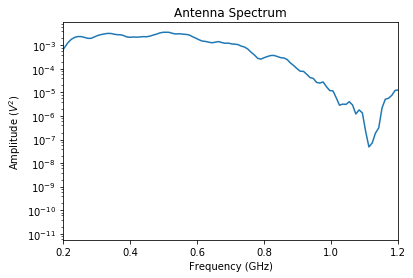

In [4]:
#Antenna Transfer



A=np.loadtxt('tf14TV.txt')

time=A[:,0];
amp=A[:,1];



#plt.plot(time,amp)
#plt.grid(True)

N=len(time);
dt=time[1]-time[0]

f = fft.fft(amp)
fshift = fft.fftshift(f)


freq = fft.fftfreq(N, dt)

plt.semilogy(fft.fftshift(freq), abs(fshift*fshift)/N*dt)
plt.xlim(0.2,1.2)




plt.title('Antenna Spectrum')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Amplitude ($V^2$)')








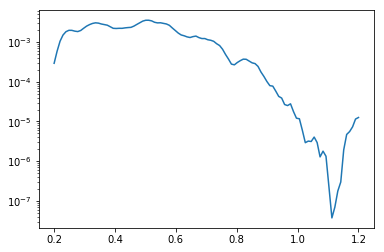

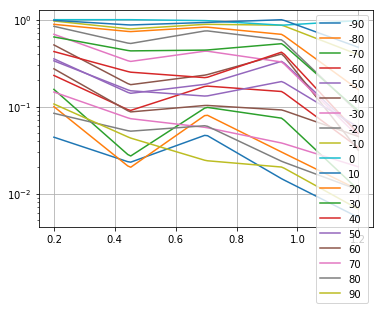

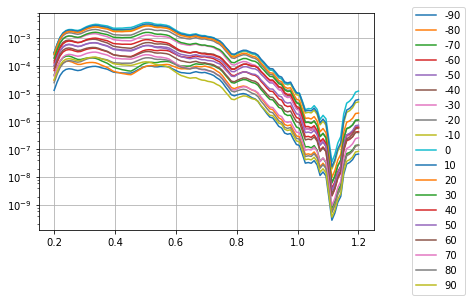

In [5]:
A=[200,450,700,950,1200]

angle_minus_90=[-13.5115,-16.4122,-13.2415,-18.3263,-22.7273
]
angle_minus_80=[-10,-17.0229,-10.911,-15.2542,-19.556
]
angle_minus_70=[-8.01527,-15.7252,-10.0636,-11.3347,-19.556
]
angle_minus_60=[-6.41221,-10.458,-7.62712,-8.26271,-14.6934
]

angle_minus_50=[-4.50382,-8.47328,-7.41525,-4.76695,-13.0021
]
angle_minus_40=[-2.90076,-7.48092,-6.35593,-3.91949,-15.0106
]
angle_minus_30=[-1.67939,-4.80916,-3.60169,-4.87288,-13.4249
]
angle_minus_20=[-0.763359,-2.74809,-1.27119,-2.33051,-10.6765
]
angle_minus_10=[-0.152672,-1.0687,-0.529661,-0.635593,-4.01691
]
angle_0=[0,0,-0.105932,-0.635593,-0.105708
]
angle_10=[-0.0763359,-0.610687,-0.317797,1.77636E-15,-3.17125
]
angle_20=[-0.534351,-1.37405,-0.847458,-1.69492,-8.03383
]
angle_30=[-1.98473,-3.58779,-3.49576,-2.75424,-10.4651
]
angle_40=[-3.66412,-6.03053,-6.67373,-3.70763,-13.1078
]
angle_50=[-4.73282,-8.16794,-8.79237,-7.09746,-12.3679
]
angle_60=[-5.64885,-10.6107,-9.85169,-10.3814,-13.4249
]
angle_70=[-8.32061,-11.374,-12.3941,-14.1949,-16.9133
]
angle_80=[-10.7634,-12.8244,-12.1822,-16.3136,-19.556
]
angle_90=[-9.69466,-13.5878,-16.2076,-16.9492,-21.7759
]




   
#g = interp1d(A, angle_minus_70)

#fnew=np.linspace(200,1200,50)








#Antenna Transfer



A=np.loadtxt('tf14TV.txt')

time=np.array(A[:,0])
amp=np.array(A[:,1])



#plt.plot(time,amp)
#plt.grid(True)

N=len(time);
dt=time[1]-time[0]

f = fft.fft(amp)
fshift = fft.fftshift(f)


freq = fft.fftfreq(N, dt)
f_dom=fft.fftshift(freq)
#amp=abs(fshift**2)/N*dt
amp=fshift

amp=amp[532:636]
f_dom=f_dom[532:636]




plt.figure(2)

g = interp1d(f_dom, amp)
fnew=np.linspace(.200,1.200,104)

amp=abs(g(fnew)**2)/N*dt
plt.semilogy(fnew,amp)
#freq = fft.fftfreq(N, dt)

#dB=10*np.log10(abs(fshift*fshift))


#ant_func= interp1d(fft.fftshift(freq)[532:636], dB[532:636])

#fnew=np.linspace(.20,1.200,101)

#dB=ant_func(fnew)


plt.figure(3)

f=[.200,.450,.700,.950,1.200]

A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']


for i in range(len(A)):
   
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,104)
    
    loss=10**(g(fnew)/10)
    
 
    plt.semilogy(fnew,loss,label=name[i])

#     plt.plot(fnew,Hloss,label=name[i])
    
    
    
#     plt.title('Antenna Transfer Function')
#     plt.ylabel('Gain (dB)')
#     plt.xlabel('Frequency (GHz)')
#     plt.xlim(0.2,1.2)
    plt.legend(loc='best')
    plt.grid(True)



plt.figure(4)
for i in range(len(A)):
   
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,104)
    
    loss=10**(g(fnew)/10)
    
 
    plt.semilogy(fnew,loss*amp,label=name[i])

#     plt.plot(fnew,Hloss,label=name[i])
    
    
    
#     plt.title('Antenna Transfer Function')
#     plt.ylabel('Gain (dB)')
#     plt.xlabel('Frequency (GHz)')
#     plt.xlim(0.2,1.2)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.grid(True)



/home/donald/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


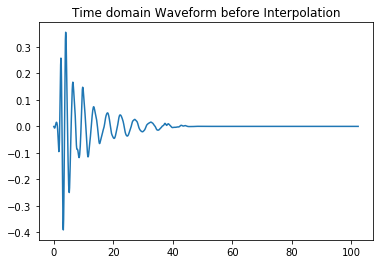

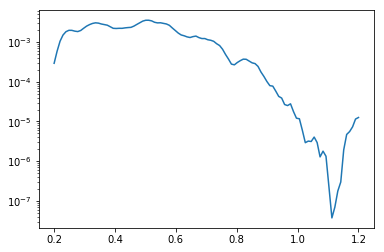

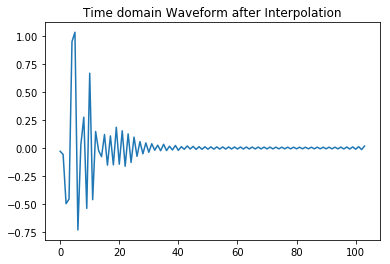

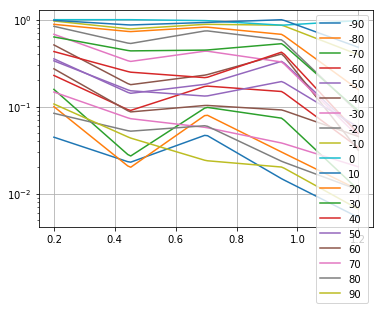

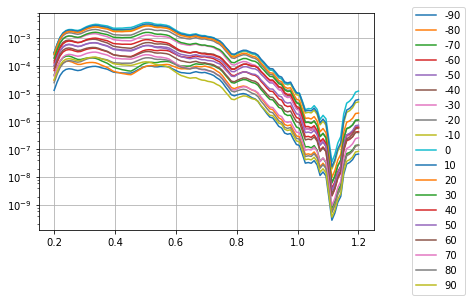

In [6]:
A=[200,450,700,950,1200]

angle_minus_90=[-13.5115,-16.4122,-13.2415,-18.3263,-22.7273
]
angle_minus_80=[-10,-17.0229,-10.911,-15.2542,-19.556
]
angle_minus_70=[-8.01527,-15.7252,-10.0636,-11.3347,-19.556
]
angle_minus_60=[-6.41221,-10.458,-7.62712,-8.26271,-14.6934
]

angle_minus_50=[-4.50382,-8.47328,-7.41525,-4.76695,-13.0021
]
angle_minus_40=[-2.90076,-7.48092,-6.35593,-3.91949,-15.0106
]
angle_minus_30=[-1.67939,-4.80916,-3.60169,-4.87288,-13.4249
]
angle_minus_20=[-0.763359,-2.74809,-1.27119,-2.33051,-10.6765
]
angle_minus_10=[-0.152672,-1.0687,-0.529661,-0.635593,-4.01691
]
angle_0=[0,0,-0.105932,-0.635593,-0.105708
]
angle_10=[-0.0763359,-0.610687,-0.317797,1.77636E-15,-3.17125
]
angle_20=[-0.534351,-1.37405,-0.847458,-1.69492,-8.03383
]
angle_30=[-1.98473,-3.58779,-3.49576,-2.75424,-10.4651
]
angle_40=[-3.66412,-6.03053,-6.67373,-3.70763,-13.1078
]
angle_50=[-4.73282,-8.16794,-8.79237,-7.09746,-12.3679
]
angle_60=[-5.64885,-10.6107,-9.85169,-10.3814,-13.4249
]
angle_70=[-8.32061,-11.374,-12.3941,-14.1949,-16.9133
]
angle_80=[-10.7634,-12.8244,-12.1822,-16.3136,-19.556
]
angle_90=[-9.69466,-13.5878,-16.2076,-16.9492,-21.7759
]




   
#g = interp1d(A, angle_minus_70)

#fnew=np.linspace(200,1200,50)








#Antenna Transfer



A=np.loadtxt('tf14TV.txt')

time=np.array(A[:,0])
amp=np.array(A[:,1])

plt.plot(time,amp)

plt.title('Time domain Waveform before Interpolation')


#plt.plot(time,amp)
#plt.grid(True)

N=len(time);
dt=time[1]-time[0]

f = fft.fft(amp)
fshift = fft.fftshift(f)


freq = fft.fftfreq(N, dt)
f_dom=fft.fftshift(freq)
#amp=abs(fshift**2)/N*dt
amp=fshift

#amp=amp[532:636]
#f_dom=f_dom[532:636]




plt.figure(2)

g_real = interp1d(f_dom, np.real(amp))
g_imag = interp1d(f_dom, np.imag(amp))

fnew=np.linspace(.200,1.200,104)
value=g_real(fnew)+1j*g_imag(fnew)
amp=abs(value**2)/N*dt
plt.semilogy(fnew,amp)




plt.figure(6)
inv=fft.ifftshift(value)
yi=fft.ifft(inv)
plt.plot(yi)
plt.title('Time domain Waveform after Interpolation')




plt.figure(3)

f=[.200,.450,.700,.950,1.200]

A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']


for i in range(len(A)):
   
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,104)
    
    loss=10**(g(fnew)/10)
    
 
    plt.semilogy(fnew,loss,label=name[i])

#     plt.plot(fnew,Hloss,label=name[i])
    
    
    
#     plt.title('Antenna Transfer Function')
#     plt.ylabel('Gain (dB)')
#     plt.xlabel('Frequency (GHz)')
#     plt.xlim(0.2,1.2)
    plt.legend(loc='best')
    plt.grid(True)



plt.figure(4)
for i in range(len(A)):
   
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,104)
    
    loss=10**(g(fnew)/10)
    
 
    plt.semilogy(fnew,loss*amp,label=name[i])

#     plt.plot(fnew,Hloss,label=name[i])
    
    
    
#     plt.title('Antenna Transfer Function')
#     plt.ylabel('Gain (dB)')
#     plt.xlabel('Frequency (GHz)')
#     plt.xlim(0.2,1.2)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.grid(True)



/home/donald/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


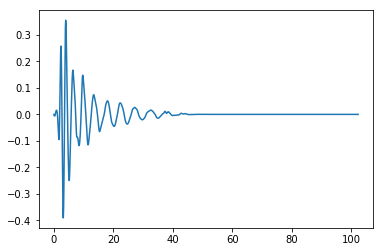

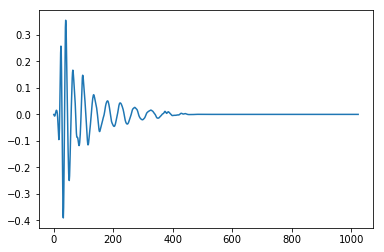

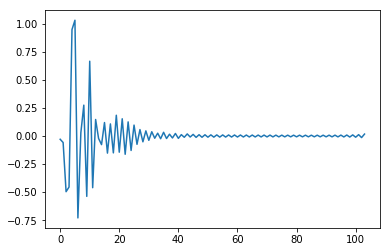

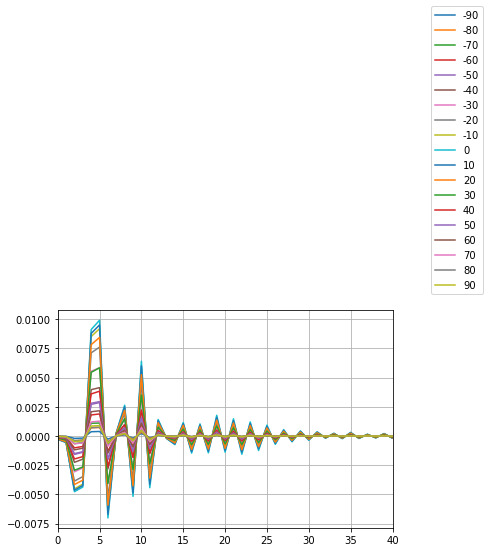

In [7]:
A=[200,450,700,950,1200]

angle_minus_90=[-13.5115,-16.4122,-13.2415,-18.3263,-22.7273
]
angle_minus_80=[-10,-17.0229,-10.911,-15.2542,-19.556
]
angle_minus_70=[-8.01527,-15.7252,-10.0636,-11.3347,-19.556
]
angle_minus_60=[-6.41221,-10.458,-7.62712,-8.26271,-14.6934
]

angle_minus_50=[-4.50382,-8.47328,-7.41525,-4.76695,-13.0021
]
angle_minus_40=[-2.90076,-7.48092,-6.35593,-3.91949,-15.0106
]
angle_minus_30=[-1.67939,-4.80916,-3.60169,-4.87288,-13.4249
]
angle_minus_20=[-0.763359,-2.74809,-1.27119,-2.33051,-10.6765
]
angle_minus_10=[-0.152672,-1.0687,-0.529661,-0.635593,-4.01691
]
angle_0=[0,0,-0.105932,-0.635593,-0.105708
]
angle_10=[-0.0763359,-0.610687,-0.317797,1.77636E-15,-3.17125
]
angle_20=[-0.534351,-1.37405,-0.847458,-1.69492,-8.03383
]
angle_30=[-1.98473,-3.58779,-3.49576,-2.75424,-10.4651
]
angle_40=[-3.66412,-6.03053,-6.67373,-3.70763,-13.1078
]
angle_50=[-4.73282,-8.16794,-8.79237,-7.09746,-12.3679
]
angle_60=[-5.64885,-10.6107,-9.85169,-10.3814,-13.4249
]
angle_70=[-8.32061,-11.374,-12.3941,-14.1949,-16.9133
]
angle_80=[-10.7634,-12.8244,-12.1822,-16.3136,-19.556
]
angle_90=[-9.69466,-13.5878,-16.2076,-16.9492,-21.7759
]




   
#g = interp1d(A, angle_minus_70)

#fnew=np.linspace(200,1200,50)








#Antenna Transfer



A=np.loadtxt('tf14TV.txt')

time=np.array(A[:,0])
amp=np.array(A[:,1])

plt.plot(time,amp)

#plt.plot(time,amp)
#plt.grid(True)

N=len(time);
dt=time[1]-time[0]

f = fft.fft(amp)
fshift = fft.fftshift(f)


freq = fft.fftfreq(N, dt)
f_dom=fft.fftshift(freq)
#amp=abs(fshift**2)/N*dt
amp=fshift


inv=fft.ifftshift(amp)
yi=fft.ifft(inv)




plt.figure(5)
plt.plot(yi)



df=f_dom[1]-f_dom[0]





plt.figure(3)

g = interp1d(f_dom, amp)
fnew=np.linspace(.200,1.200,104)

#amp=abs(g(fnew)**2)/N*dt
amp=g(fnew)
#plt.semilogy(fnew,abs(amp**2)/N*dt)


inv=fft.ifftshift(amp)
yi=fft.ifft(inv)
plt.plot(yi)



f=[.200,.450,.700,.950,1.200]

A=[angle_minus_90,angle_minus_80,angle_minus_70,angle_minus_60,angle_minus_50,angle_minus_40,angle_minus_30,angle_minus_20,angle_minus_10,angle_0,angle_10,angle_20,angle_30,angle_40,angle_50,angle_60,angle_70,angle_80,angle_90]
name=['-90','-80','-70','-60','-50','-40','-30','-20','-10','0','10','20','30','40','50','60','70','80','90']


plt.figure(4)


for i in range(len(A)):
   
    
   
    g = interp1d(f, A[i])
    fnew=np.linspace(.200,1.200,104)
    
    loss=10**(g(fnew)/10)
    
    inv=fft.ifftshift(amp)
    yi=fft.ifft(inv)
    
    plt.plot(yi*loss/len(yi),label=name[i])
    plt.xlim(0,40)

    
    
#     plt.title('Antenna Transfer Function')
#     plt.ylabel('Gain (dB)')
#     plt.xlabel('Frequency (GHz)')
#     plt.xlim(0.2,1.2)
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.grid(True)



(1e-08, 0.01)

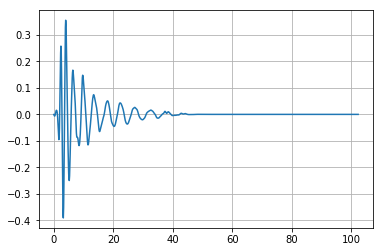

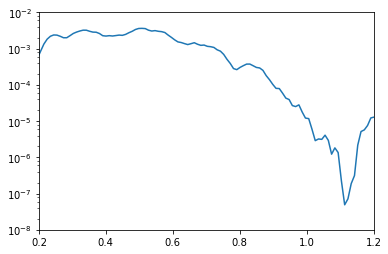

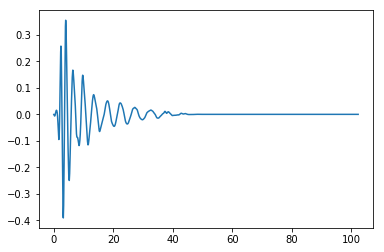

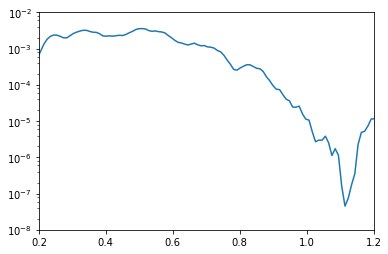

In [8]:







#Antenna Transfer



A=np.loadtxt('tf14TV.txt')

time=np.array(A[:,0])
amp=np.array(A[:,1])

ant_func=interp1d(time,amp)
new_time=np.linspace(0.0,102.3,8316)

plt.figure(1)
plt.plot(time,amp)
plt.grid(True)


plt.figure(2)
N=len(time);
dt=time[1]-time[0]
f = fft.fft(amp)
fshift = fft.fftshift(f)
freq = fft.fftfreq(N, dt)
f_dom=fft.fftshift(freq)
plt.semilogy(f_dom,abs(fshift**2)/N*dt)
plt.xlim(0.2,1.2)
plt.ylim(10**(-8),10**(-2))


plt.figure(3)
plt.plot(new_time,ant_func(new_time))


plt.figure(4)
N=len(new_time);
dt=new_time[1]-new_time[0]
f = fft.fft(ant_func(new_time))
fshift = fft.fftshift(f)
freq = fft.fftfreq(N, dt)
f_dom=fft.fftshift(freq)
plt.semilogy(f_dom,abs(fshift**2)/N*dt)
plt.xlim(0.2,1.2)
plt.ylim(10**(-8),10**(-2))

-20.6499278499
8316
-20.6499205863
8316


(1e-08, 0.01)

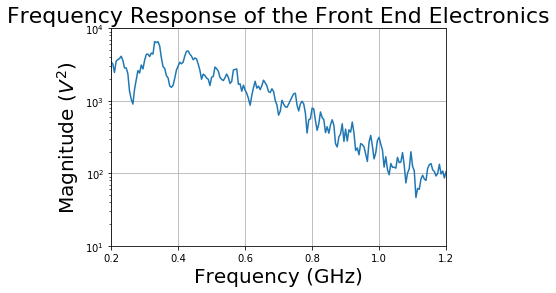

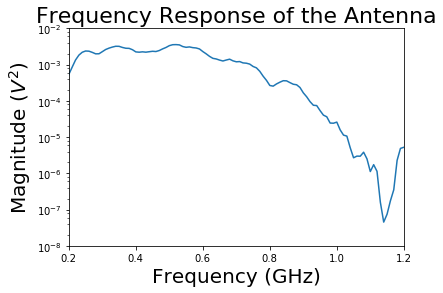

In [9]:
#Electronics Transfer



SurfTime=[]

SurfAmp=[]

f = open('Surf_Atten.csv')

Surf = csv.reader(f)

for row in Surf:
    SurfTime.append(float(row[0]))
    SurfAmp.append(float(row[1]))

f.close()


#plt.grid(True)
#plt.plot(SurfTime,SurfAmp)
#plt.title('Output Signal',fontsize=22)
#plt.xlabel('Time (ns)',fontsize=20)
#plt.ylabel('Magnitude (V)',fontsize=20)

#print(np.sqrt(max(np.array(SurfAmp)*np.array(SurfAmp))))

#plt.xlim(75,150)


#plt.figure(2)
N = len(SurfTime)
dt = SurfTime[1]-SurfTime[0]
#print(dt, N)


fft_Surf = fft.fft(SurfAmp)
fft_Surf_shift = fft.fftshift(fft_Surf)

freq_Surf = fft.fftfreq(N, dt)

SURF_FFT = fft_Surf_shift

#plt.semilogy(fft.fftshift(freq_Surf), abs(SURF_FFT))

#plt.grid(True)
#plt.title('Spectrum of Output',fontsize=22)
#plt.xlabel('Frequency (GHz)',fontsize=20)
#plt.ylabel('Magnitude ($V^2$)',fontsize=20)
#plt.xlim([0.2,1.2])
#plt.ylim(1,1000)

















AmpaAmp=[]
AmpaTime=[]

f = open('Ampa_Atten.csv')

Ampa = csv.reader(f)

for row in Ampa:
    AmpaTime.append(float(row[0])*10**(-9))
    AmpaAmp.append(float(row[1]))

f.close()
#plt.grid(True)
#plt.plot(AmpaTime,AmpaAmp)
#plt.title('Input Signal',fontsize=22)
#plt.xlabel('Time (s)',fontsize=20)
#plt.ylabel('Magnitude (V)',fontsize=20)
#plt.xlim(1e-8,.18e-7)
#print(np.sqrt(max(np.array(AmpaAmp)*np.array(AmpaAmp))))





#plt.figure(2)
N = len(AmpaTime)
dt = AmpaTime[1]-AmpaTime[0]
#print(dt, N)


fft_Ampa = fft.fft(AmpaAmp)
fft_Ampa_shift = fft.fftshift(fft_Ampa)

freq_Ampa = fft.fftfreq(N, dt)

Ampa_FFT = fft_Ampa_shift


#FreqDom=fft.fftshift(freq_Ampa)/10**9

#plt.semilogy(FreqDom, abs(Ampa_FFT))
#plt.grid(True)
#plt.title('Spectrum of Input',fontsize=22)
#plt.xlabel('Frequency (GHz)',fontsize=20)
#plt.ylabel('Magnitude ($V^2$)',fontsize=20)
#plt.xlim([0.2,1.2])
#plt.ylim(10**(-4),1)



#elec_Transfer=[]
#for i in range(len(SURF_FFT)):
#    elec_Transfer.append(SURF_FFT[i]/Ampa_FFT[i])

elec_Transfer=SURF_FFT+Ampa_FFT
#print(SURF_FFT,Ampa_FFT,elec_Transfer)


freqDom=fft.fftshift(freq_Ampa)*10**(-9)


df=freqDom[2]-freqDom[1]

plt.semilogy(freqDom, abs(elec_Transfer**2))


print(freqDom[30])
print(len(freqDom))


plt.title('Frequency Response of the Front End Electronics',fontsize=22)
plt.xlabel('Frequency (GHz)',fontsize=20)
plt.ylabel('Magnitude ($V^2$)',fontsize=20)


plt.grid(True)

plt.xlim(0.2,1.2);
plt.ylim(10**(1),10**4);




#f=fft.ifftshift(elec_Transfer)
#yi=fft.ifft(f)









#Antenna Transfer



A=np.loadtxt('tf14TV.txt')

time=np.array(A[:,0])
amp=np.array(A[:,1])

ant_func=interp1d(time,amp)
new_time=np.linspace(0.0,102.3,8316)




plt.figure(4)
N=len(new_time);
dt=new_time[1]-new_time[0]
f = fft.fft(ant_func(new_time))
fshift = fft.fftshift(f)
#freq = fft.fftfreq(N, dt*1.9539)
freq = fft.fftfreq(N, dt*1.95386)
#freq = fft.fftfreq(N, dt)
f_dom=fft.fftshift(freq)
f_dom=f_dom*2
amplitude=(abs(fshift**2)/N*dt)
print(f_dom[30]/2)
print(len(f_dom))
plt.semilogy(f_dom,amplitude)

plt.title('Frequency Response of the Antenna',fontsize=22)
plt.xlabel('Frequency (GHz)',fontsize=20)
plt.ylabel('Magnitude ($V^2$)',fontsize=20)


plt.xlim(0.2,1.2)
plt.ylim(10**(-8),10**(-2))



#plt.figure(3)

#plt.semilogy(f_dom,abs(elec_Transfer**2)+abs(fshift**2)/N*dt)
#plt.xlim(0.2,1.2)

6.71322751322
13.4264503037


/home/donald/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


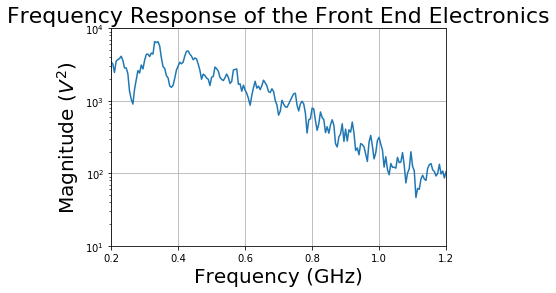

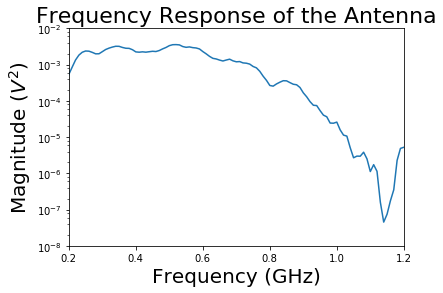

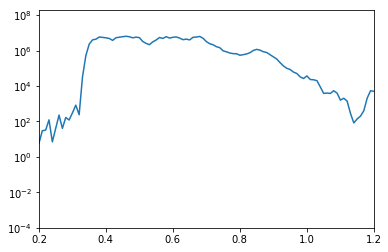

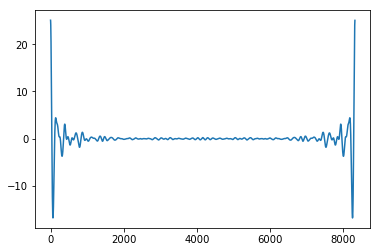

In [10]:
#Electronics Transfer



SurfTime=[]

SurfAmp=[]

f = open('Surf_Atten.csv')

Surf = csv.reader(f)

for row in Surf:
    SurfTime.append(float(row[0]))
    SurfAmp.append(float(row[1]))

f.close()


#plt.grid(True)
#plt.plot(SurfTime,SurfAmp)
#plt.title('Output Signal',fontsize=22)
#plt.xlabel('Time (ns)',fontsize=20)
#plt.ylabel('Magnitude (V)',fontsize=20)

#print(np.sqrt(max(np.array(SurfAmp)*np.array(SurfAmp))))

#plt.xlim(75,150)


#plt.figure(2)
N = len(SurfTime)
dt = SurfTime[1]-SurfTime[0]
#print(dt, N)


fft_Surf = fft.fft(SurfAmp)
fft_Surf_shift = fft.fftshift(fft_Surf)

freq_Surf = fft.fftfreq(N, dt)

SURF_FFT = fft_Surf_shift

#plt.semilogy(fft.fftshift(freq_Surf), abs(SURF_FFT))

#plt.grid(True)
#plt.title('Spectrum of Output',fontsize=22)
#plt.xlabel('Frequency (GHz)',fontsize=20)
#plt.ylabel('Magnitude ($V^2$)',fontsize=20)
#plt.xlim([0.2,1.2])
#plt.ylim(1,1000)

















AmpaAmp=[]
AmpaTime=[]

f = open('Ampa_Atten.csv')

Ampa = csv.reader(f)

for row in Ampa:
    AmpaTime.append(float(row[0])*10**(-9))
    AmpaAmp.append(float(row[1]))

f.close()
#plt.grid(True)
#plt.plot(AmpaTime,AmpaAmp)
#plt.title('Input Signal',fontsize=22)
#plt.xlabel('Time (s)',fontsize=20)
#plt.ylabel('Magnitude (V)',fontsize=20)
#plt.xlim(1e-8,.18e-7)
#print(np.sqrt(max(np.array(AmpaAmp)*np.array(AmpaAmp))))





#plt.figure(2)
N = len(AmpaTime)
dt = AmpaTime[1]-AmpaTime[0]
#print(dt, N)


fft_Ampa = fft.fft(AmpaAmp)
fft_Ampa_shift = fft.fftshift(fft_Ampa)

freq_Ampa = fft.fftfreq(N, dt)

Ampa_FFT = fft_Ampa_shift


#FreqDom=fft.fftshift(freq_Ampa)/10**9

#plt.semilogy(FreqDom, abs(Ampa_FFT))
#plt.grid(True)
#plt.title('Spectrum of Input',fontsize=22)
#plt.xlabel('Frequency (GHz)',fontsize=20)
#plt.ylabel('Magnitude ($V^2$)',fontsize=20)
#plt.xlim([0.2,1.2])
#plt.ylim(10**(-4),1)



#elec_Transfer=[]
#for i in range(len(SURF_FFT)):
#    elec_Transfer.append(SURF_FFT[i]/Ampa_FFT[i])

elec_Transfer=SURF_FFT+Ampa_FFT
#print(SURF_FFT,Ampa_FFT,elec_Transfer)


freqDom=fft.fftshift(freq_Ampa)*10**(-9)


df=freqDom[2]-freqDom[1]

plt.semilogy(freqDom, abs(elec_Transfer**2))


print(freqDom[5500])



plt.title('Frequency Response of the Front End Electronics',fontsize=22)
plt.xlabel('Frequency (GHz)',fontsize=20)
plt.ylabel('Magnitude ($V^2$)',fontsize=20)


plt.grid(True)

plt.xlim(0.2,1.2);
plt.ylim(10**(1),10**4);




#f=fft.ifftshift(elec_Transfer)
#yi=fft.ifft(f)









#Antenna Transfer



A=np.loadtxt('tf14TV.txt')

time=np.array(A[:,0])
amp=np.array(A[:,1])

ant_func=interp1d(time,amp)
new_time=np.linspace(0.0,102.3,8316)




plt.figure(4)
N=len(new_time);
dt=new_time[1]-new_time[0]
f = fft.fft(ant_func(new_time))
fshift_ant = fft.fftshift(f)
#freq = fft.fftfreq(N, dt*1.9539)
freq = fft.fftfreq(N, dt*1.95386)
#freq = fft.fftfreq(N, dt)
f_dom=fft.fftshift(freq)
f_dom=f_dom*2
amplitude=(abs(fshift_ant**2)/N*dt)

plt.semilogy(f_dom,amplitude)
print(f_dom[5500])
plt.title('Frequency Response of the Antenna',fontsize=22)
plt.xlabel('Frequency (GHz)',fontsize=20)
plt.ylabel('Magnitude ($V^2$)',fontsize=20)


plt.xlim(0.2,1.2)
plt.ylim(10**(-8),10**(-2))


total_fft_amp=np.zeros(8316)
for i in range(8316):
    total_fft_amp[i]=(abs(fshift_ant[i])*abs(elec_Transfer[i]))
    
    
plt.figure(3)
plt.semilogy(f_dom,abs(total_fft_amp**2))
plt.xlim(0.2,1.2)
plt.ylim(10**(-4))


plt.figure(5)
f=fft.ifftshift(total_fft_amp)
yi=fft.ifft(f)
plt.plot(yi)


/home/donald/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


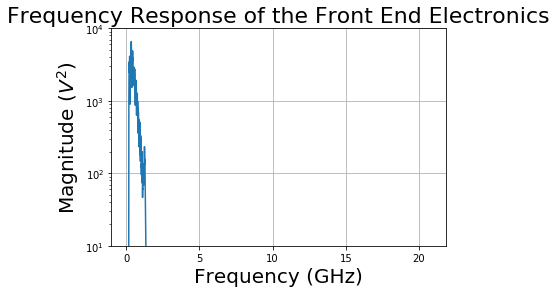

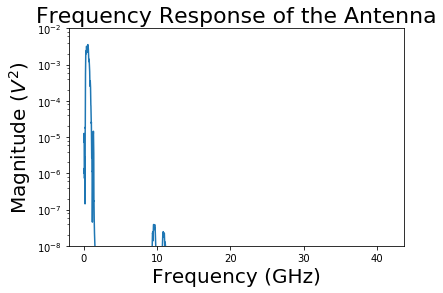

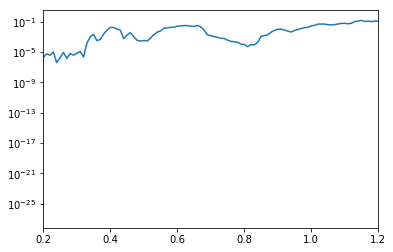

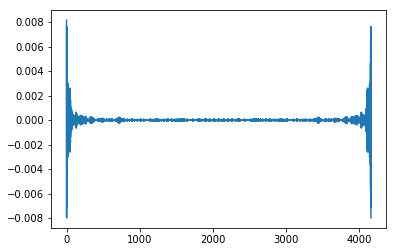

In [11]:
#Electronics Transfer



SurfTime=[]

SurfAmp=[]

f = open('Surf_Atten.csv')

Surf = csv.reader(f)

for row in Surf:
    SurfTime.append(float(row[0]))
    SurfAmp.append(float(row[1]))

f.close()


#plt.grid(True)
#plt.plot(SurfTime,SurfAmp)
#plt.title('Output Signal',fontsize=22)
#plt.xlabel('Time (ns)',fontsize=20)
#plt.ylabel('Magnitude (V)',fontsize=20)

#print(np.sqrt(max(np.array(SurfAmp)*np.array(SurfAmp))))

#plt.xlim(75,150)


#plt.figure(2)
N = len(SurfTime)
dt = SurfTime[1]-SurfTime[0]
#print(dt, N)


fft_Surf = fft.fft(SurfAmp)
fft_Surf_shift = fft.fftshift(fft_Surf)

freq_Surf = fft.fftfreq(N, dt)

SURF_FFT = fft_Surf_shift

#plt.semilogy(fft.fftshift(freq_Surf), abs(SURF_FFT))

#plt.grid(True)
#plt.title('Spectrum of Output',fontsize=22)
#plt.xlabel('Frequency (GHz)',fontsize=20)
#plt.ylabel('Magnitude ($V^2$)',fontsize=20)
#plt.xlim([0.2,1.2])
#plt.ylim(1,1000)

















AmpaAmp=[]
AmpaTime=[]

f = open('Ampa_Atten.csv')

Ampa = csv.reader(f)

for row in Ampa:
    AmpaTime.append(float(row[0])*10**(-9))
    AmpaAmp.append(float(row[1]))

f.close()
#plt.grid(True)
#plt.plot(AmpaTime,AmpaAmp)
#plt.title('Input Signal',fontsize=22)
#plt.xlabel('Time (s)',fontsize=20)
#plt.ylabel('Magnitude (V)',fontsize=20)
#plt.xlim(1e-8,.18e-7)
#print(np.sqrt(max(np.array(AmpaAmp)*np.array(AmpaAmp))))





#plt.figure(2)
N = len(AmpaTime)
dt = AmpaTime[1]-AmpaTime[0]
#print(dt, N)


fft_Ampa = fft.fft(AmpaAmp)
fft_Ampa_shift = fft.fftshift(fft_Ampa)

freq_Ampa = fft.fftfreq(N, dt)

Ampa_FFT = fft_Ampa_shift


#FreqDom=fft.fftshift(freq_Ampa)/10**9

#plt.semilogy(FreqDom, abs(Ampa_FFT))
#plt.grid(True)
#plt.title('Spectrum of Input',fontsize=22)
#plt.xlabel('Frequency (GHz)',fontsize=20)
#plt.ylabel('Magnitude ($V^2$)',fontsize=20)
#plt.xlim([0.2,1.2])
#plt.ylim(10**(-4),1)



#elec_Transfer=[]
#for i in range(len(SURF_FFT)):
#    elec_Transfer.append(SURF_FFT[i]/Ampa_FFT[i])

elec_Transfer=SURF_FFT+Ampa_FFT
#print(SURF_FFT,Ampa_FFT,elec_Transfer)


freqDom=fft.fftshift(freq_Ampa)*10**(-9)


df=freqDom[2]-freqDom[1]

freqDom=freqDom[4158:8316]
elec_Transfer=elec_Transfer[4158:8316]

plt.semilogy(freqDom, abs(elec_Transfer**2))


#print(freqDom[5500])



plt.title('Frequency Response of the Front End Electronics',fontsize=22)
plt.xlabel('Frequency (GHz)',fontsize=20)
plt.ylabel('Magnitude ($V^2$)',fontsize=20)


plt.grid(True)

#plt.xlim(0.2,1.2);
plt.ylim(10**(1),10**4);




#f=fft.ifftshift(elec_Transfer)
#yi=fft.ifft(f)









#Antenna Transfer



A=np.loadtxt('tf14TV.txt')

time=np.array(A[:,0])
amp=np.array(A[:,1])

ant_func=interp1d(time,amp)
new_time=np.linspace(0.0,102.3,8316)




plt.figure(4)
N=len(new_time);
dt=new_time[1]-new_time[0]
f = fft.fft(ant_func(new_time))
fshift_ant = fft.fftshift(f)
#freq = fft.fftfreq(N, dt*1.9539)
freq = fft.fftfreq(N, dt*1.95386)
#freq = fft.fftfreq(N, dt)
f_dom=fft.fftshift(freq)
f_dom=f_dom*2
amplitude=(abs(fshift_ant**2)/N*dt)
f_dom=f_dom[4158:8316]
amplitude=amplitude[4158:8316]
plt.semilogy(f_dom,amplitude)
#print(f_dom[5500])
plt.title('Frequency Response of the Antenna',fontsize=22)
plt.xlabel('Frequency (GHz)',fontsize=20)
plt.ylabel('Magnitude ($V^2$)',fontsize=20)


#plt.xlim(0.2,1.2)
plt.ylim(10**(-8),10**(-2))


total_fft_amp=np.zeros(4158)
for i in range(len(f_dom)):
    
    total_fft_amp[i]=(abs(fshift_ant[i])*abs(elec_Transfer[i]))
    
    
    
plt.figure(3)
plt.semilogy(f_dom,abs(total_fft_amp**2))
plt.xlim(0.2,1.2)
#plt.ylim(10**(-4))


plt.figure(5)
f=fft.ifftshift(total_fft_amp)
yi=fft.ifft(f)
plt.plot(yi)
#Electronics Transfer




/home/donald/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


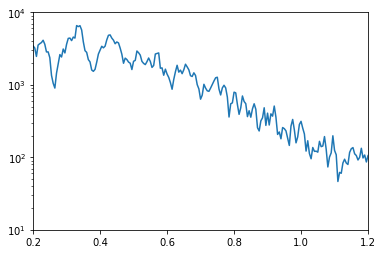

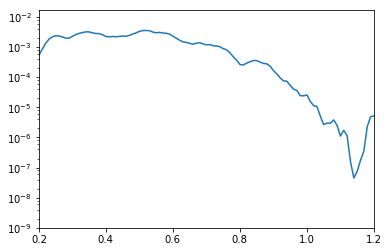

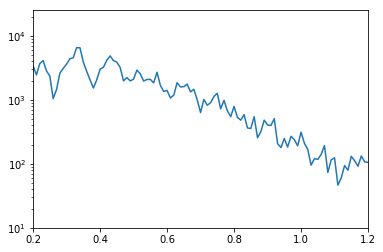

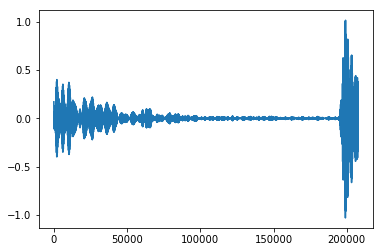

In [12]:
#Electronics Transfer



SurfTime=[]

SurfAmp=[]

f = open('Surf_Atten.csv')

Surf = csv.reader(f)

for row in Surf:
    SurfTime.append(float(row[0]))
    SurfAmp.append(float(row[1]))

f.close()




#plt.grid(True)
#plt.plot(SurfTime,SurfAmp)
#plt.title('Output Signal',fontsize=22)
#plt.xlabel('Time (ns)',fontsize=20)
#plt.ylabel('Magnitude (V)',fontsize=20)

#print(np.sqrt(max(np.array(SurfAmp)*np.array(SurfAmp))))

#plt.xlim(75,150)


#plt.figure(2)
N = len(SurfTime)
dt = SurfTime[1]-SurfTime[0]
#print(dt, N)


fft_Surf = fft.fft(SurfAmp)
fft_Surf_shift = fft.fftshift(fft_Surf)

freq_Surf = fft.fftfreq(N, dt)

SURF_FFT = fft_Surf_shift

#plt.semilogy(fft.fftshift(freq_Surf), abs(SURF_FFT))

#plt.grid(True)
#plt.title('Spectrum of Output',fontsize=22)
#plt.xlabel('Frequency (GHz)',fontsize=20)
#plt.ylabel('Magnitude ($V^2$)',fontsize=20)
#plt.xlim([0.2,1.2])
#plt.ylim(1,1000)

















AmpaAmp=[]
AmpaTime=[]

f = open('Ampa_Atten.csv')

Ampa = csv.reader(f)

for row in Ampa:
    AmpaTime.append(float(row[0])*10**(-9))
    AmpaAmp.append(float(row[1]))

f.close()
#plt.grid(True)
#plt.plot(AmpaTime,AmpaAmp)
#plt.title('Input Signal',fontsize=22)
#plt.xlabel('Time (s)',fontsize=20)
#plt.ylabel('Magnitude (V)',fontsize=20)
#plt.xlim(1e-8,.18e-7)
#print(np.sqrt(max(np.array(AmpaAmp)*np.array(AmpaAmp))))





#plt.figure(2)
N = len(AmpaTime)
dt = AmpaTime[1]-AmpaTime[0]
#print(dt, N)


fft_Ampa = fft.fft(AmpaAmp)
fft_Ampa_shift = fft.fftshift(fft_Ampa)

freq_Ampa = fft.fftfreq(N, dt)

Ampa_FFT = fft_Ampa_shift


#FreqDom=fft.fftshift(freq_Ampa)/10**9

#plt.semilogy(FreqDom, abs(Ampa_FFT))
#plt.grid(True)
#plt.title('Spectrum of Input',fontsize=22)
#plt.xlabel('Frequency (GHz)',fontsize=20)
#plt.ylabel('Magnitude ($V^2$)',fontsize=20)
#plt.xlim([0.2,1.2])
#plt.ylim(10**(-4),1)



#elec_Transfer=[]
#for i in range(len(SURF_FFT)):
#    elec_Transfer.append(SURF_FFT[i]/Ampa_FFT[i])

elec_Transfer=SURF_FFT+Ampa_FFT
#print(SURF_FFT,Ampa_FFT,elec_Transfer)


freqDom=fft.fftshift(freq_Ampa)*10**(-9)


df=freqDom[2]-freqDom[1]

freqDom=freqDom[4158:8316]
elec_Transfer=elec_Transfer[4158:8316]





# plt.semilogy(freqDom, abs(elec_Transfer**2))





# plt.title('Frequency Response of the Front End Electronics',fontsize=22)
# plt.xlabel('Frequency (GHz)',fontsize=20)
# plt.ylabel('Magnitude ($V^2$)',fontsize=20)


# plt.grid(True)

# #plt.xlim(0.2,1.2);
# plt.ylim(10**(1),10**4);

plt.figure(2)
plt.semilogy(freqDom, abs(elec_Transfer**2))
plt.xlim(0.2,1.2);
plt.ylim(10**(1),10**4);




#f=fft.ifftshift(elec_Transfer)
#yi=fft.ifft(f)









#Antenna Transfer



A=np.loadtxt('tf14TV.txt')

time=np.array(A[:,0])
amp=np.array(A[:,1])

ant_func=interp1d(time,amp)
number_of_points=8316
new_time=np.linspace(0.0,102.3,number_of_points)




#plt.figure(3)
N=len(new_time);
dt=new_time[1]-new_time[0]
f = fft.fft(ant_func(new_time))
fshift_ant = fft.fftshift(f)
#freq = fft.fftfreq(N, dt*1.9539)
freq = fft.fftfreq(N, dt*1.95386*2)
freq=freq*2
#freq = fft.fftfreq(N, dt)
f_dom=fft.fftshift(freq)
f_dom=f_dom*2
amplitude=(abs(fshift_ant**2)/N*dt)
f_dom=f_dom[4158:8316]
amplitude=amplitude[4158:8316]
#plt.semilogy(f_dom,amplitude)

# plt.title('Frequency Response of the Antenna',fontsize=22)
# plt.xlabel('Frequency (GHz)',fontsize=20)
# plt.ylabel('Magnitude ($V^2$)',fontsize=20)


# #print(f_dom[119])

# #plt.xlim(0.2,1.2)
# plt.ylim(10**(-8),10**(-2))




plt.figure(5)
plt.semilogy(f_dom,amplitude)
plt.xlim(0.2,1.2)
plt.ylim(10**(-9))




total_fft_amp=np.zeros(2079,dtype=np.complex)
for i in range(2079):
    
    total_fft_amp[i]=((fshift_ant[i])+(elec_Transfer[2*i]))
    #print(f_dom[i],freqDom[2*i])
    #print(fshift_ant[i],elec_Transfer[2*i],total_fft_amp[i])

# for i in range(len(total_fft_amp)):
#     print(total_fft_amp[i])

total_fft_amp=total_fft_amp[1:2079]



plt.figure(8)
plt.semilogy(f_dom[1:2079],abs(total_fft_amp**2))
plt.xlim(0.2,1.2)
df=f_dom[2]-f_dom[1]
dt=1/df
N=len(total_fft_amp)
plt.ylim(10**(1))


plt.figure(7)
f=fft.ifftshift(total_fft_amp)
yi=fft.ifft(f)
time=np.linspace(1,dt*N,N)
#yi=np.array(yi[1040:2078],yi[0:1039])
plt.plot(time,yi)

[-20.54987975 -20.54487734 -20.53987494 -20.53487253 -20.52987013
 -20.52486772 -20.51986532 -20.51486291 -20.50986051 -20.5048581
 -20.4998557  -20.49485329 -20.48985089 -20.48484848 -20.47984608
 -20.47484367 -20.46984127 -20.46483886 -20.45983646 -20.45483405
 -20.44983165 -20.44482924 -20.43982684 -20.43482443 -20.42982203]
0.200096200096 1.20057720058
[-40.15157392 -40.14179993 -40.13202593 -40.12225194 -40.11247794
 -40.10270395 -40.09292995 -40.08315596 -40.07338196 -40.06360796
 -40.05383397 -40.04405997 -40.03428598 -40.02451198 -40.01473799
 -40.00496399 -39.99519    -39.985416   -39.975642   -39.96586801
 -39.95609401 -39.94632002 -39.93654602 -39.92677203 -39.91699803]
0.195479912 1.172879472


/home/donald/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


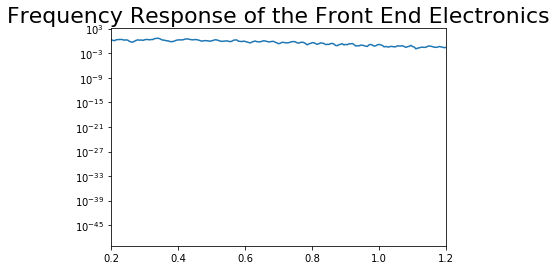

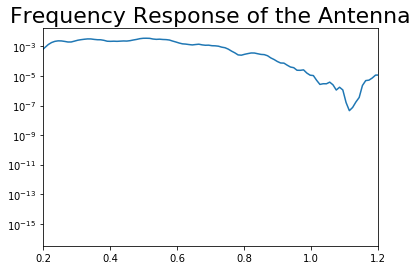

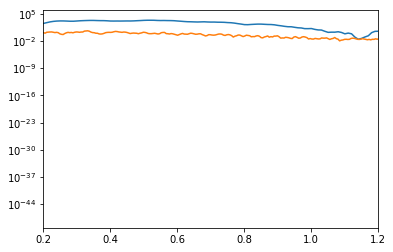

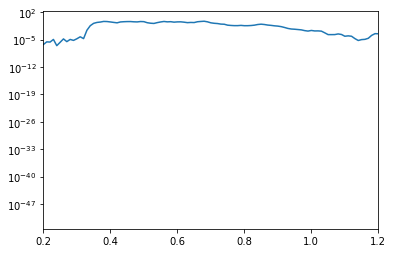

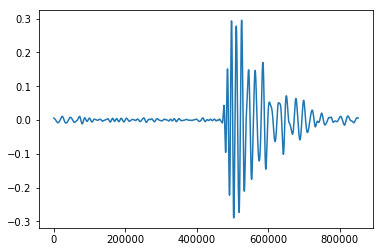

In [28]:
#Electronics Transfer



SurfTime=[]

SurfAmp=[]

f = open('Surf_Atten.csv')

Surf = csv.reader(f)

for row in Surf:
    SurfTime.append(float(row[0]))
    SurfAmp.append(float(row[1]))

f.close()




N = len(SurfTime)
dt = SurfTime[1]-SurfTime[0]

fft_Surf = fft.fft(SurfAmp)
fft_Surf_shift = fft.fftshift(fft_Surf)

freq_Surf = fft.fftfreq(N, dt)

SURF_FFT = fft_Surf_shift















AmpaAmp=[]
AmpaTime=[]

f = open('Ampa_Atten.csv')

Ampa = csv.reader(f)

for row in Ampa:
    AmpaTime.append(float(row[0])*10**(-9))
    AmpaAmp.append(float(row[1]))

f.close()





N = len(AmpaTime)
dt = AmpaTime[1]-AmpaTime[0]

fft_Ampa = fft.fft(AmpaAmp)
fft_Ampa_shift = fft.fftshift(fft_Ampa)

freq_Ampa = fft.fftfreq(N, dt)

Ampa_FFT = fft_Ampa_shift


elec_Transfer=SURF_FFT*Ampa_FFT


freqDom=fft.fftshift(freq_Ampa)*10**(-9)


df=freqDom[2]-freqDom[1]




plt.figure(2)
plt.title('Frequency Response of the Front End Electronics',fontsize=22)


plt.semilogy(freqDom, abs(elec_Transfer**2))
plt.xlim(0.2,1.2);
print(freqDom[50:75])


#HERE
print(2*freqDom[4178],2*freqDom[4278])
#HERE









#Antenna Transfer



A=np.loadtxt('tf14TV.txt')

time=np.array(A[:,0])
amp=np.array(A[:,1])

ant_func=interp1d(time,amp)
number_of_points=8316
new_time=np.linspace(0.0,102.3,number_of_points)




N=len(new_time);
dt=new_time[1]-new_time[0]
f = fft.fft(ant_func(new_time))
fshift_ant = fft.fftshift(f)
freq = fft.fftfreq(N, dt)
f_dom=fft.fftshift(freq)

amplitude=(abs(fshift_ant**2)/N*dt)


print(f_dom[50:75])



plt.figure(5)
plt.title('Frequency Response of the Antenna',fontsize=22)
plt.semilogy(f_dom,amplitude)
plt.xlim(0.2,1.2)



plt.figure(20)
plt.semilogy(2*freqDom,abs(fshift_ant**2))
plt.semilogy(0.5*f_dom,abs(elec_Transfer**2))
plt.xlim(0.2,1.2)


#HERE
print(f_dom[4178],f_dom[4278])
#HERE



total_fft_amp=np.zeros(8316,dtype=np.complex)
for i in range(8316):

    total_fft_amp[i]=((fshift_ant[i])*(elec_Transfer[i]))







plt.figure(8)
plt.semilogy(freqDom*2,abs(total_fft_amp**2)/N)
plt.xlim(0.2,1.2)
df=f_dom[2]-f_dom[1]
dt=1/df
N=len(total_fft_amp)



plt.figure(7)
f=fft.ifftshift(total_fft_amp)
yi=fft.ifft(f)
time=np.linspace(1,dt*N,N)

plt.plot(time,yi)